# Z-score


- a statistical measurement that describes a value's relationship to the mean of a group of values
- measured in terms of standard deviation from the mean

Why is Z-score important for traders?
- it reveals if a value is typical/atypical for a specificied data set
- in other words, traders can identify potential buy/sell opportunities

How to read Z-score?
- 0: the data point's score is identical to the mean score
- 1.0: the value is one standard deviation from the mean
- 3.0: the value is three standard deviation from the mean

From a trader's interpretation:
- a z-score significantly higher than 1.5 might indicate that the stock is overprice compared to its historical average, while a value lower than -1.5 might indicate the oppposite

Z-scores may be positive of negative
- negative: it is below the mean
- positive: it is above the mean

Formula:

$$ z = (x - \mu)/\sigma $$

Where
- $z$ = Z-score
- $x$ = the value being evaluated
- $\mu$ = the mean
- $\sigma$ = the standard deviation


Reference: https://www.investopedia.com/terms/z/zscore.asp#:~:text=Z%2Dscore%20is%20a%20statistical,traders%20to%20help%20determine%20volatility.

## Calculating z-score

Imagine you have the following data:

Where
- $x$ = 57
- $\mu$ = 52
- $\sigma$ = 4

In [2]:
x = 57
mean = 52
std = 4

z = (x - mean) / std
z

1.25

In [13]:
# The x-value is indeed 1.25 standard deviation from the mean.
1.25 * std

5.0

## Plotting the Standard Normal Distribution (SND)

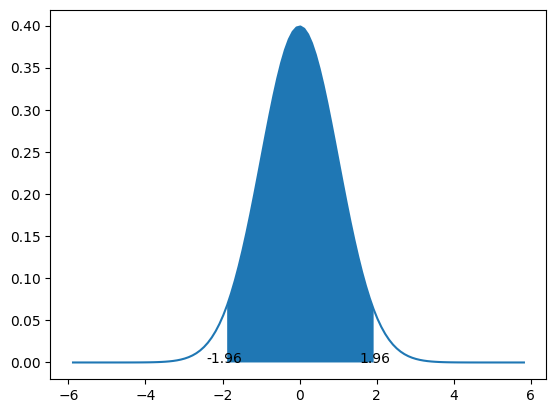

In [23]:
import numpy as np
from matplotlib.pyplot import subplots
from scipy.stats import norm

std_lim = 1.96  # 95% Confidence Interval (CI)

# Plot between -10 and 10 with 0.1 steps
X = np.arange(-std_lim * 3, std_lim * 3, 0.1)
ax = subplots()[1]

# Mean and std of any SND is always 0 and 1 respectively.
mean = 0
std = 1
pdf = norm.pdf(X, mean, std)
ax.plot(X, pdf)

lo = mean - std_lim * std
hi = mean + std_lim * std

ax.fill_between(X, pdf, where=(X > lo) & (X < hi))
ax.text(lo, 0, lo, ha="center")
ax.text(hi, 0, hi, ha="center");

Observation:
- the probability of randomly selecting a score between -1.96 and +1.96 standard deviations from the mean is 95%.
- if there is less than a 5% chance of a raw score being selected randomly, then this is a statistically significant result

According to a unit normal table, the values for a z-score of 1.64 are 0.9495, 0.0505, and 0.4495. The values for a z-score of 2.48 are 0.9934, 0.0066, and 0.4934. 